In [1]:
pwd

'/home/wsuser/work'

In [5]:

import os, types
import pandas as pd
from botocore.client import Config
import ibm_boto3

def __iter__(self): return 0

# @hidden_cell
# The following code accesses a file in your IBM Cloud Object Storage. It includes your credentials.
# You might want to remove those credentials before you share the notebook.
client_b5f7df447f0b415aa7eeda8b38841dda = ibm_boto3.client(service_name='s3',
    ibm_api_key_id='SvOc2NQL0jaJXuj1wJJusrX39TMmA4Dzn17T7QtO1-lN',
    ibm_auth_endpoint="https://iam.cloud.ibm.com/oidc/token",
    config=Config(signature_version='oauth'),
    endpoint_url='https://s3.private.us.cloud-object-storage.appdomain.cloud')

streaming_body_1 = client_b5f7df447f0b415aa7eeda8b38841dda.get_object(Bucket='animalcnn-donotdelete-pr-olyl7tsymaexhj', Key='Animal_Dataset.zip')['Body']

# Your data file was loaded into a botocore.response.StreamingBody object.
# Please read the documentation of ibm_boto3 and pandas to learn more about the possibilities to load the data.
# ibm_boto3 documentation: https://ibm.github.io/ibm-cos-sdk-python/
# pandas documentation: http://pandas.pydata.org/


In [3]:
from io import BytesIO
import zipfile
unzip=zipfile.ZipFile(BytesIO(streaming_body_1.read()),'r')
file_paths=unzip.namelist()
for path in file_paths:
    unzip.extract(path)
    

BadZipFile: File is not a zip file

In [9]:
ls -l

total 4
drwxrwx--- 4 wsuser wscommon 4096 Sep  2 13:52 dataset/


In [6]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

In [7]:
train_datagen=ImageDataGenerator(rescale=1./255,zoom_range=0.2,horizontal_flip=True,vertical_flip=False)

In [8]:
test_datagen=ImageDataGenerator(rescale=1./255)

In [10]:
ls

dataset/


In [14]:
cd '/home/wsuser/work/dataset'

/home/wsuser/work/dataset


In [15]:
ls

Testing/  Training/


In [18]:
x_train=train_datagen.flow_from_directory(r"/home/wsuser/work/dataset/Training",target_size=(64,64),class_mode='categorical',batch_size=24)

Found 1238 images belonging to 4 classes.


In [19]:
x_test=train_datagen.flow_from_directory(r"/home/wsuser/work/dataset/Testing",target_size=(64,64),class_mode='categorical',batch_size=24)

Found 326 images belonging to 4 classes.


In [20]:
len(x_test)

14

In [21]:
326/24

13.583333333333334

In [22]:
x_train.class_indices

{'bears': 0, 'crows': 1, 'elephants': 2, 'rats': 3}

In [ ]:
## CNN importing ##

In [24]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Convolution2D,MaxPooling2D,Flatten

In [25]:
model=Sequential()

In [27]:
model.add(Convolution2D(32,(3,3),input_shape=(64,64,3),activation='relu'))

In [28]:
model.add(MaxPooling2D(pool_size=(2,2)))

In [29]:
model.add(Flatten())

In [30]:
model.add(Dense(300,activation='relu'))
model.add(Dense(150,activation='relu'))
model.add(Dense(4,activation='softmax'))#multiclass classification

In [31]:
model.compile(loss='categorical_crossentropy',optimizer='adam',metrics=['accuracy'])#optimize=>minimize error, maximize production

In [33]:
model.fit_generator(x_train,steps_per_epoch=len(x_train),epochs=10,validation_data=x_test,validation_steps=len(x_test))

/tmp/wsuser/ipykernel_164/234118701.py:1: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  model.fit_generator(x_train,steps_per_epoch=len(x_train),epochs=10,validation_data=x_test,validation_steps=len(x_test))


Epoch 1/10
52/52 [==============================] - 10s 181ms/step - loss: 1.5184 - accuracy: 0.4208 - val_loss: 1.0907 - val_accuracy: 0.4847
Epoch 2/10
52/52 [==============================] - 9s 175ms/step - loss: 0.9139 - accuracy: 0.6244 - val_loss: 0.7222 - val_accuracy: 0.6933
Epoch 3/10
52/52 [==============================] - 9s 175ms/step - loss: 0.7493 - accuracy: 0.6955 - val_loss: 0.5766 - val_accuracy: 0.8006
Epoch 4/10
52/52 [==============================] - 9s 176ms/step - loss: 0.6821 - accuracy: 0.7399 - val_loss: 0.6295 - val_accuracy: 0.7577
Epoch 5/10
52/52 [==============================] - 9s 176ms/step - loss: 0.6070 - accuracy: 0.7641 - val_loss: 0.4910 - val_accuracy: 0.8282
Epoch 6/10
52/52 [==============================] - 9s 177ms/step - loss: 0.5115 - accuracy: 0.8061 - val_loss: 0.5391 - val_accuracy: 0.7883
Epoch 7/10
52/52 [==============================] - 9s 174ms/step - loss: 0.4930 - accuracy: 0.8174 - val_loss: 0.4178 - val_accuracy: 0.8558
Epoch

In [34]:
model.save('animal.h5')

In [ ]:
##Test mode #

In [35]:
import numpy as np
from tensorflow.keras.models import load_model
from tensorflow.keras.preprocessing import image

In [36]:
model=load_model('animal.h5')

In [50]:
img=image.load_img(r"/home/wsuser/work/dataset/Testing/bears/k4 (72).jpeg",target_size=(64,64))

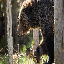

In [51]:
img

In [52]:
x=image.img_to_array(img)

In [53]:
x

array([[[114.,  83.,  37.],
        [ 95.,  71.,  35.],
        [ 78.,  62.,  37.],
        ...,
        [125., 115., 106.],
        [ 88.,  87.,  83.],
        [ 60.,  57.,  64.]],

       [[ 91.,  67.,  39.],
        [ 70.,  53.,  27.],
        [ 67.,  60.,  34.],
        ...,
        [123., 113., 104.],
        [ 92.,  91.,  87.],
        [ 56.,  47.,  48.]],

       [[ 54.,  40.,  27.],
        [ 70.,  63.,  44.],
        [ 69.,  67.,  42.],
        ...,
        [121., 111., 102.],
        [ 94.,  93.,  89.],
        [ 50.,  36.,  35.]],

       ...,

       [[ 94., 139.,  70.],
        [123., 131.,  80.],
        [107.,  94.,  59.],
        ...,
        [ 97.,  88.,  81.],
        [ 97.,  88.,  81.],
        [102.,  84.,  74.]],

       [[103., 134.,  58.],
        [132., 164.,  99.],
        [ 87., 111.,  37.],
        ...,
        [ 91.,  74.,  58.],
        [ 87.,  75.,  61.],
        [102.,  95.,  89.]],

       [[159., 182., 100.],
        [122., 149.,  80.],
        [ 90., 1

In [54]:
x.ndim

3

In [55]:
x=np.expand_dims(x,axis=0)

In [56]:
x.ndim

4

In [57]:
pred=np.argmax(model.predict(x),axis=1)

In [58]:
pred

array([2])

In [59]:
index=['bears','crows','elephants','rats']

In [60]:
index[pred[0]]

'elephants'